## <p style="color:blue;">The dataset contains weather data from 2022 to 2033. Let's predict the weather data from 2034 to 2035 and add the predicted data to the existing dataframe.</p>

#### 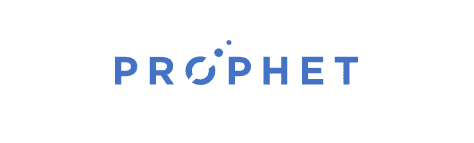 <p style="color:red;">[Facebook Prophet](https://facebook.github.io/prophet/) is an open-source algorithm that has seen tremendous popularity since its inception in 2017. It’s main selling points are that it’s easy to use, interpretable, and easily interacts with a subject matter expert.</p>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#! pip install prophet

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

In [4]:
data=pd.read_csv('weather_data_cleaned.csv')
df=data.copy()

In [5]:
df['date']=pd.to_datetime(df['date'], errors='raise')

In [6]:
df.head()

,date,temperature,avg_humidity,avg_dewpoint,avg_barometer,avg_windspeed,avg_gustspeed,avg_direction,monthly_rainfall,yearly_rainfall,rain_per_minute_max,temperature_max,temperature_min,humidity_max,humidity_min,pressure_max,pressure_min,windspeed_max,gust_speed_max,heat_index_max,month,diff_pressure
0,2022-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,0.0,40.0,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,1,0.166
1,2022-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,0.0,52.0,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,1,0.401
2,2022-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,0.0,41.0,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,1,0.972
3,2022-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,0.0,19.0,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,1,0.339
4,2022-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,0.0,30.0,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,1,0.665


### Data prediction for next 2 years (2034 and 2035)

In [7]:
def prophet_predict(Data, periods: int):
    # Rename columns to 'ds' and 'y'
    Data.columns.values[0] = 'ds'
    Data.columns.values[1] = 'y'
    
    # Instantiate Prophet model
    model = Prophet()
    
    # Fit model to data
    model.fit(Data)
    
    # Create future dataframe with specified number of periods
    future = model.make_future_dataframe(periods=periods)
    
    # Make predictions
    predictions = model.predict(future)
    
    model.plot(predictions, xlabel=Data.columns.values[0], ylabel=Data.columns.values[1])
    plt.title(Data.columns[1])
    plt.show()
    # Return predictions
    return predictions[['ds', 'yhat']].tail(periods)

In [8]:
temp_data = df[['date', 'temperature']] 

13:26:14 - cmdstanpy - INFO - Chain [1] start processing
13:26:15 - cmdstanpy - INFO - Chain [1] done processing


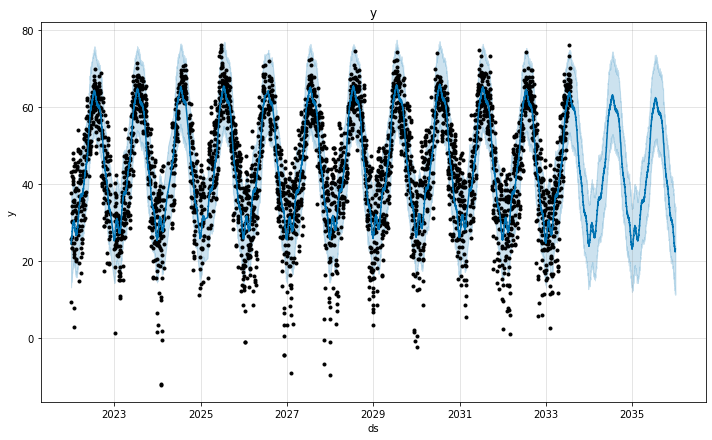

In [9]:
pred_temp = prophet_predict(temp_data, periods=886)

In [10]:
pred_temp

,ds,yhat
3900,2033-07-29,62.361383
3901,2033-07-30,61.606472
3902,2033-07-31,61.715395
3903,2033-08-01,62.034449
3904,2033-08-02,61.634456
...,...,...
4781,2035-12-27,22.657660
4782,2035-12-28,23.018046
4783,2035-12-29,22.380762
4784,2035-12-30,22.655198


In [11]:
df.columns

Index(['date', 'temperature', 'avg_humidity', 'avg_dewpoint', 'avg_barometer',
       'avg_windspeed', 'avg_gustspeed', 'avg_direction', 'monthly_rainfall',
       'yearly_rainfall', 'rain_per_minute_max', 'temperature_max',
       'temperature_min', 'humidity_max', 'humidity_min', 'pressure_max',
       'pressure_min', 'windspeed_max', 'gust_speed_max', 'heat_index_max',
       'month', 'diff_pressure'],
      dtype='object')

13:26:16 - cmdstanpy - INFO - Chain [1] start processing
13:26:17 - cmdstanpy - INFO - Chain [1] done processing


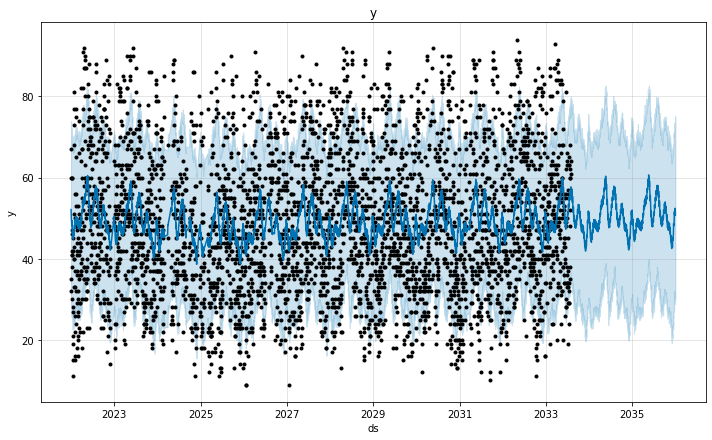

In [12]:
avg_humidity=df[['date', 'avg_humidity']] 
pred_humidity = prophet_predict(avg_humidity, periods=886)

13:26:18 - cmdstanpy - INFO - Chain [1] start processing
13:26:19 - cmdstanpy - INFO - Chain [1] done processing


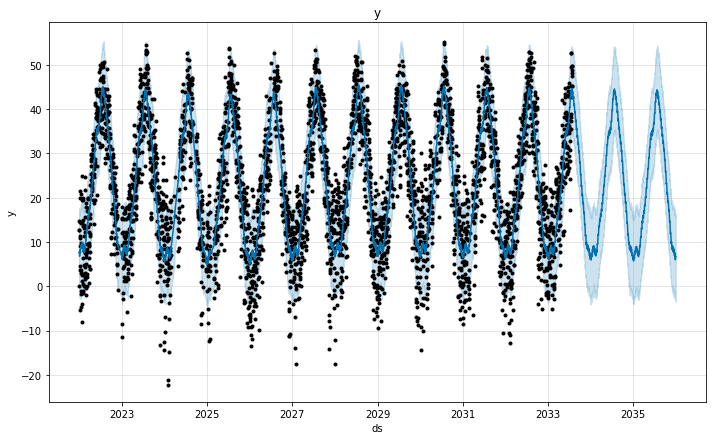

In [13]:
avg_dewpoint=df[['date', 'avg_dewpoint']] 
pred_dewpoint = prophet_predict(avg_dewpoint, periods=886)

13:26:20 - cmdstanpy - INFO - Chain [1] start processing
13:26:21 - cmdstanpy - INFO - Chain [1] done processing


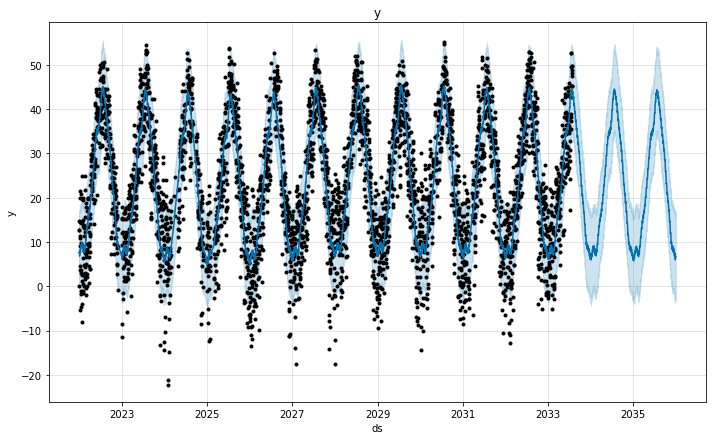

In [14]:
avg_barometer=df[['date', 'avg_dewpoint']] 
pred_barometer = prophet_predict(avg_barometer, periods=886)

13:26:22 - cmdstanpy - INFO - Chain [1] start processing
13:26:23 - cmdstanpy - INFO - Chain [1] done processing


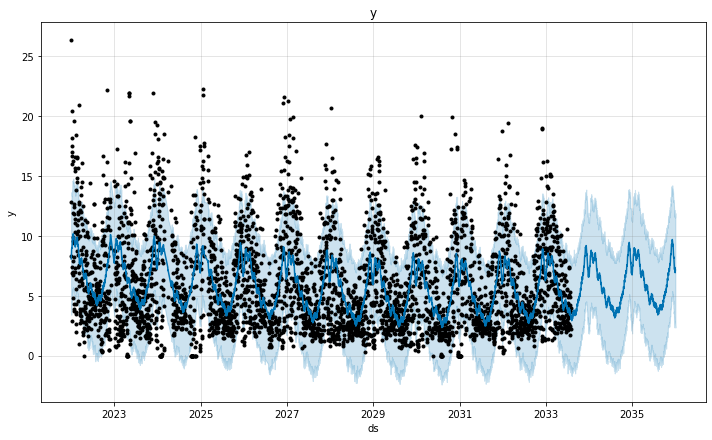

In [15]:
avg_windspeed=df[['date', 'avg_windspeed']] 
pred_windspeed = prophet_predict(avg_windspeed, periods=886)

13:26:24 - cmdstanpy - INFO - Chain [1] start processing
13:26:25 - cmdstanpy - INFO - Chain [1] done processing


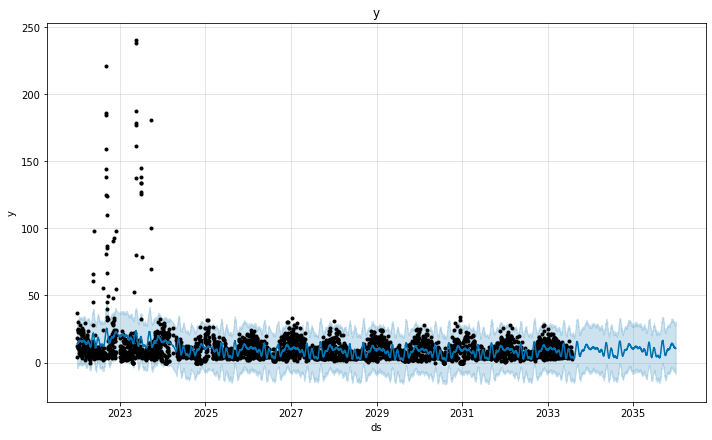

In [16]:
avg_gustspeed=df[['date', 'avg_gustspeed']] 
pred_gustspeed = prophet_predict(avg_gustspeed, periods=886)

13:26:26 - cmdstanpy - INFO - Chain [1] start processing
13:26:27 - cmdstanpy - INFO - Chain [1] done processing


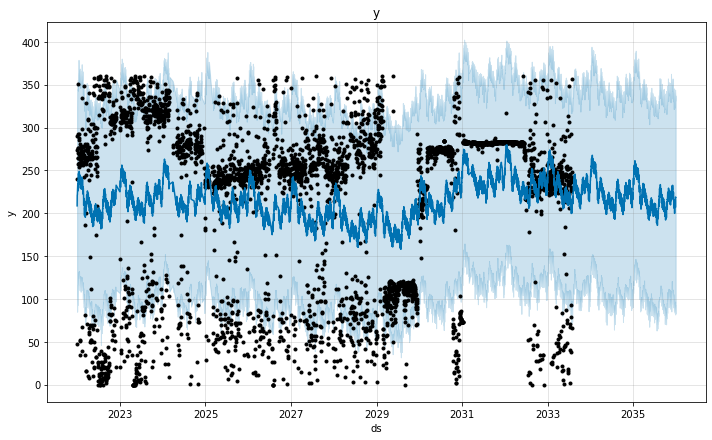

In [17]:
avg_direction=df[['date', 'avg_direction']] 
pred_direction = prophet_predict(avg_direction, periods=886)

13:26:28 - cmdstanpy - INFO - Chain [1] start processing
13:26:29 - cmdstanpy - INFO - Chain [1] done processing


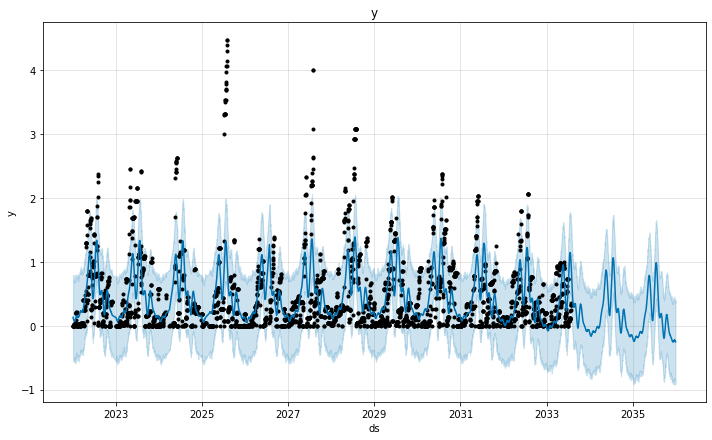

In [18]:
monthly_rainfall=df[['date', 'monthly_rainfall']] 
pred_m_rainfall = prophet_predict(monthly_rainfall, periods=886)

13:26:30 - cmdstanpy - INFO - Chain [1] start processing
13:26:31 - cmdstanpy - INFO - Chain [1] done processing


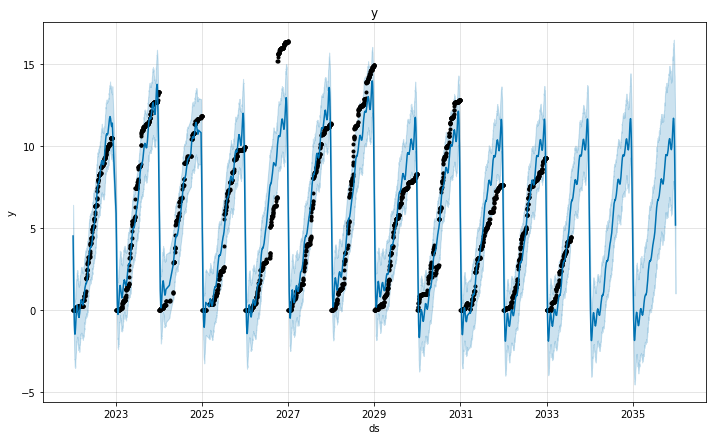

In [19]:
yearly_rainfall=df[['date', 'yearly_rainfall']] 
pred_y_rainfall = prophet_predict(yearly_rainfall, periods=886)

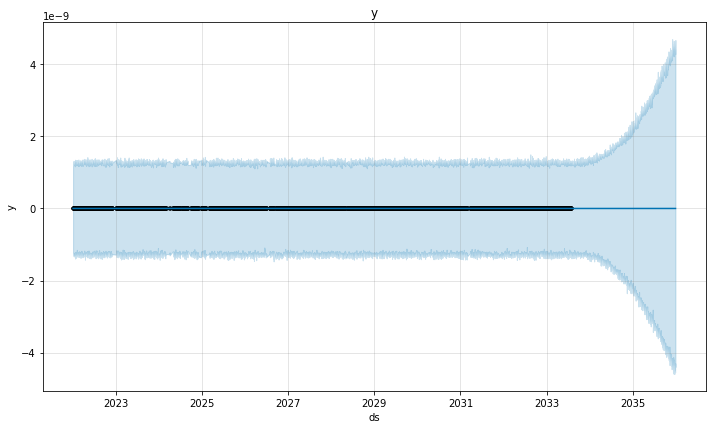

In [20]:
rain_per_minute_max=df[['date', 'rain_per_minute_max']] 
pred_rain_max = prophet_predict(rain_per_minute_max, periods=886)

13:26:34 - cmdstanpy - INFO - Chain [1] start processing
13:26:35 - cmdstanpy - INFO - Chain [1] done processing


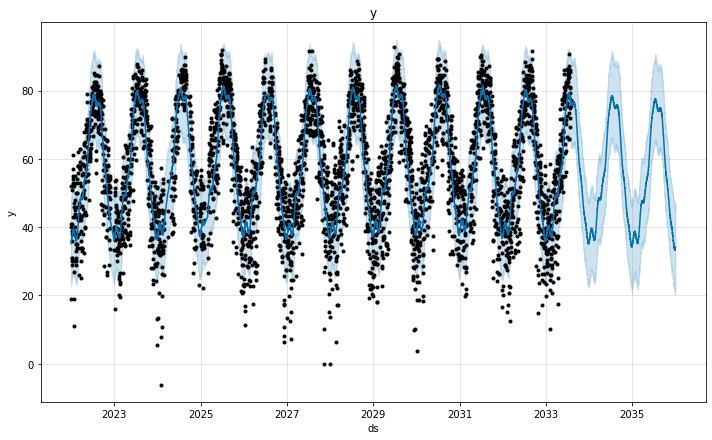

In [21]:
temperature_max=df[['date', 'temperature_max']] 
pred_temp_max = prophet_predict(temperature_max, periods=886)

13:26:36 - cmdstanpy - INFO - Chain [1] start processing
13:26:37 - cmdstanpy - INFO - Chain [1] done processing


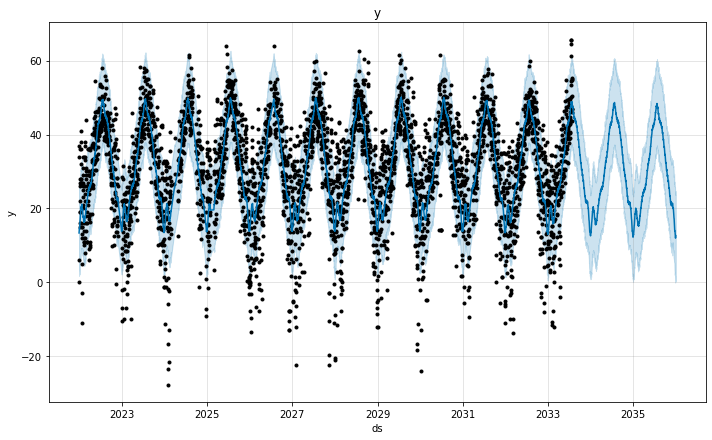

In [22]:
temperature_min=df[['date', 'temperature_min']] 
pred_temp_min = prophet_predict(temperature_min, periods=886)

13:26:38 - cmdstanpy - INFO - Chain [1] start processing
13:26:39 - cmdstanpy - INFO - Chain [1] done processing


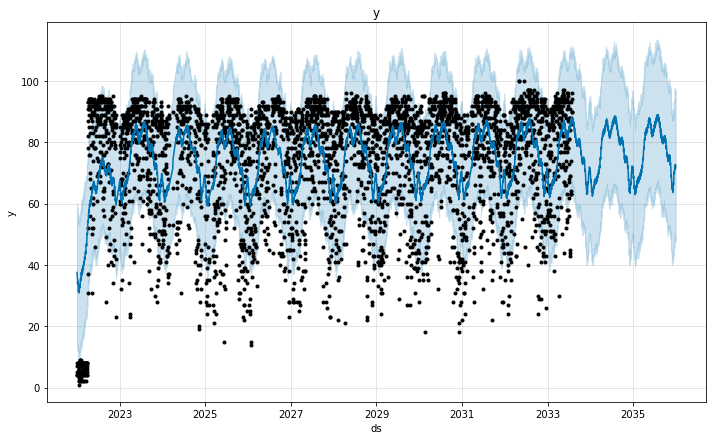

In [23]:
humidity_max=df[['date', 'humidity_max']] 
pred_humidity_max = prophet_predict(humidity_max, periods=886)

13:26:41 - cmdstanpy - INFO - Chain [1] start processing
13:26:41 - cmdstanpy - INFO - Chain [1] done processing


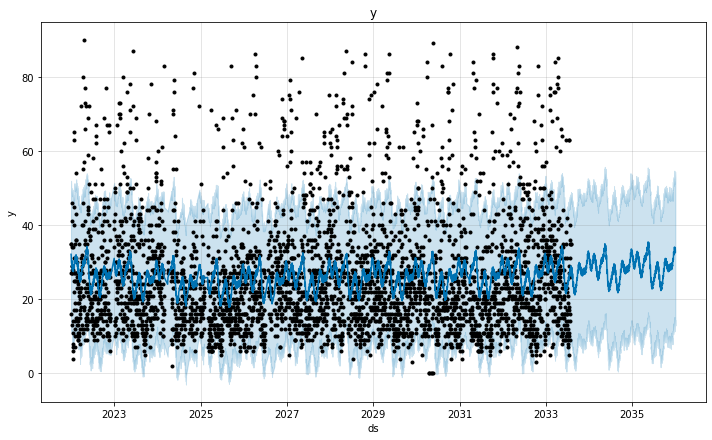

In [24]:
humidity_min=df[['date', 'humidity_min']] 
pred_humidity_min = prophet_predict(humidity_min, periods=886)

13:26:43 - cmdstanpy - INFO - Chain [1] start processing
13:26:44 - cmdstanpy - INFO - Chain [1] done processing


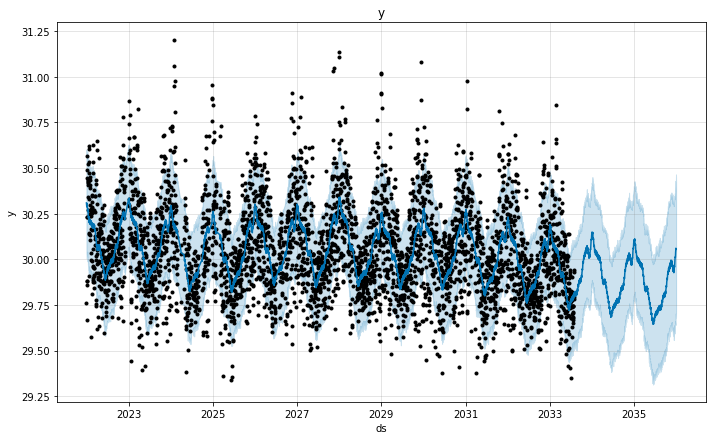

In [25]:
pressure_max=df[['date', 'pressure_max']] 
pred_pressure_max = prophet_predict(pressure_max, periods=886)

13:26:45 - cmdstanpy - INFO - Chain [1] start processing
13:26:46 - cmdstanpy - INFO - Chain [1] done processing


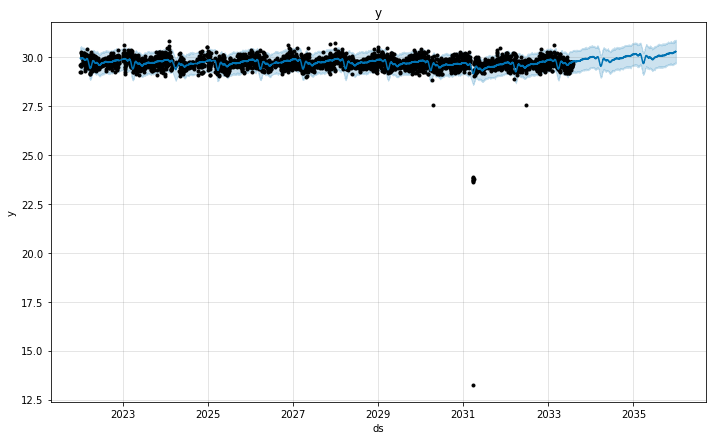

In [26]:
pressure_min=df[['date', 'pressure_min']] 
pred_pressure_min = prophet_predict(pressure_min, periods=886)

13:26:48 - cmdstanpy - INFO - Chain [1] start processing
13:26:48 - cmdstanpy - INFO - Chain [1] done processing


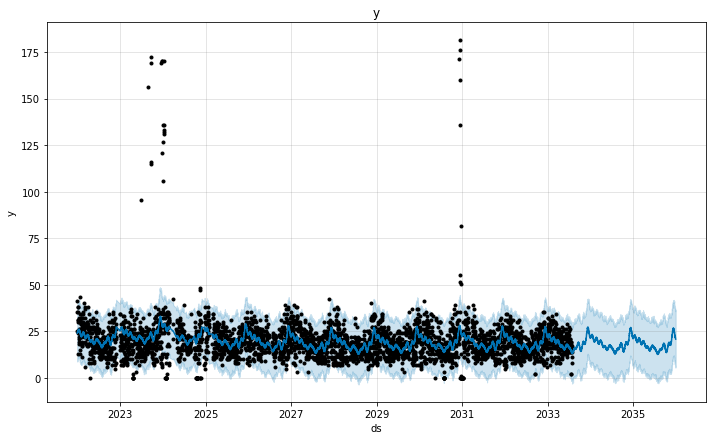

In [27]:
windspeed_max=df[['date', 'windspeed_max']] 
pred_wind_max = prophet_predict(windspeed_max, periods=886)

13:26:49 - cmdstanpy - INFO - Chain [1] start processing
13:26:50 - cmdstanpy - INFO - Chain [1] done processing


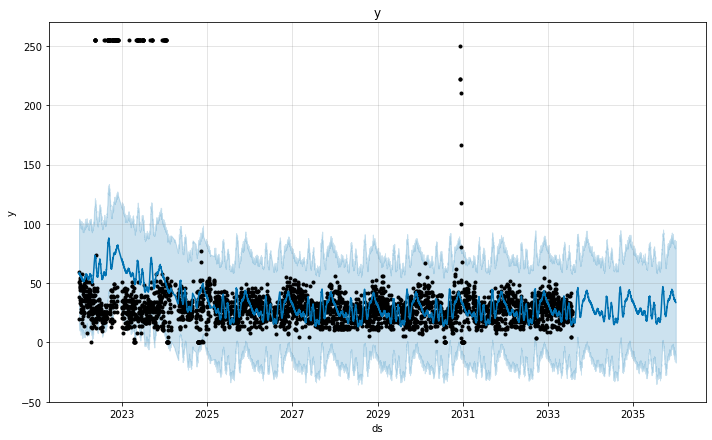

13:26:52 - cmdstanpy - INFO - Chain [1] start processing
13:26:52 - cmdstanpy - INFO - Chain [1] done processing


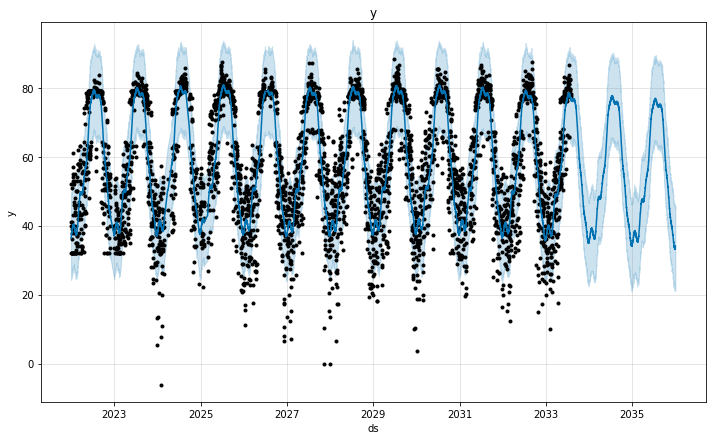

13:26:54 - cmdstanpy - INFO - Chain [1] start processing
13:26:54 - cmdstanpy - INFO - Chain [1] done processing


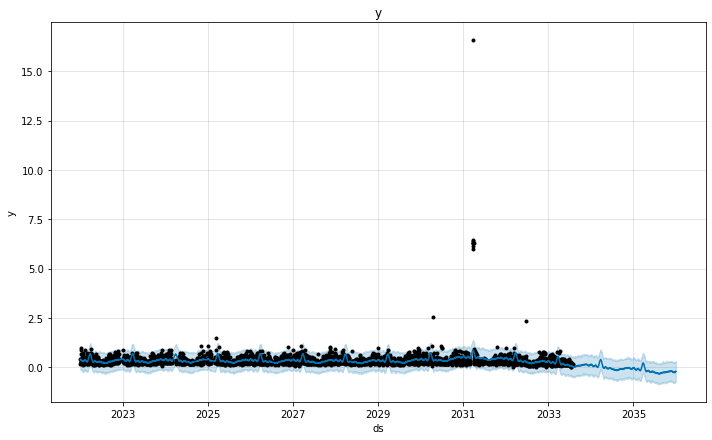

In [28]:
gust_speed_max=df[['date', 'gust_speed_max']] 
pred_gust_max = prophet_predict(gust_speed_max, periods=886)
heat_index_max=df[['date', 'heat_index_max']] 
pred_heat_max = prophet_predict(heat_index_max, periods=886)
diff_pressure=df[['date', 'diff_pressure']] 
pred_diff_pressure = prophet_predict(diff_pressure, periods=886)

In [29]:
pred_temp = pred_temp.rename(columns={'yhat': 'temperature'})
pred_humidity = pred_humidity.rename(columns={'yhat': 'avg_humidity'})
pred_dewpoint = pred_dewpoint.rename(columns={'yhat': 'avg_dewpoint'})
pred_barometer = pred_barometer.rename(columns={'yhat': 'avg_barometer'})
pred_windspeed = pred_windspeed.rename(columns={'yhat': 'avg_windspeed'})
pred_gustspeed = pred_gustspeed.rename(columns={'yhat': 'avg_gustspeed'})
pred_direction = pred_direction.rename(columns={'yhat': 'avg_direction'})
pred_m_rainfall = pred_m_rainfall.rename(columns={'yhat': 'monthly_rainfall'})
pred_y_rainfall = pred_y_rainfall.rename(columns={'yhat': 'yearly_rainfall'})
pred_rain_max = pred_rain_max.rename(columns={'yhat': 'rain_per_minute_max'})
pred_temp_max = pred_temp_max.rename(columns={'yhat': 'temperature_max'})
pred_temp_min = pred_temp_min.rename(columns={'yhat': 'temperature_min'})
pred_humidity_max = pred_humidity_max.rename(columns={'yhat': 'pred_humidity_max'})
pred_humidity_min = pred_humidity_min.rename(columns={'yhat': 'humidity_min'})
pred_pressure_max = pred_pressure_max.rename(columns={'yhat': 'pressure_max'})
pred_pressure_min = pred_pressure_min.rename(columns={'yhat': 'pressure_min'})
pred_wind_max = pred_wind_max.rename(columns={'yhat': 'windspeed_max'})
pred_gust_max = pred_gust_max.rename(columns={'yhat': 'gust_speed_max'})
pred_heat_max = pred_heat_max.rename(columns={'yhat': 'heat_index_max'})
pred_diff_pressure = pred_diff_pressure.rename(columns={'yhat': 'diff_pressure'})

### Merge columns

In [30]:
def merge_on_column(column_name, *dfs):

    if len(dfs) < 2:
        raise ValueError("At least two dataframes are required to merge.")
    
    # Merge the first two dataframes
    merged_df = pd.merge(dfs[0], dfs[1], on=column_name)
    
    # Loop through the remaining dataframes and merge with the merged_df
    for df in dfs[2:]:
        merged_df = pd.merge(merged_df, df, on=column_name)
    
    return merged_df

In [31]:
pred_data=merge_on_column('ds', pred_temp,pred_humidity,pred_dewpoint ,pred_barometer ,pred_windspeed ,pred_gustspeed, 
pred_direction ,pred_m_rainfall ,pred_y_rainfall ,pred_rain_max ,pred_temp_max ,pred_temp_min ,pred_humidity_max 
                           ,pred_humidity_min ,pred_pressure_max ,pred_pressure_min ,pred_wind_max ,pred_gust_max, 
                           pred_heat_max ,pred_diff_pressure)

In [32]:
pred_data = pred_data.rename(columns={'ds': 'date'})

In [33]:
pred_data.head()

,date,temperature,avg_humidity,avg_dewpoint,avg_barometer,avg_windspeed,avg_gustspeed,avg_direction,monthly_rainfall,yearly_rainfall,rain_per_minute_max,temperature_max,temperature_min,pred_humidity_max,humidity_min,pressure_max,pressure_min,windspeed_max,gust_speed_max,heat_index_max,diff_pressure
0,2033-07-29,62.361383,55.825277,43.702553,43.702553,3.268160,4.361357,209.828575,0.950419,6.542766,0.0,77.259534,47.699986,87.249868,27.297750,29.805627,29.789731,14.028720,17.636439,77.120225,0.024661
1,2033-07-30,61.606472,57.715947,44.060506,44.060506,3.034604,3.962218,200.338569,0.914577,6.563485,0.0,76.563078,47.258026,88.216750,28.973473,29.817539,29.795073,13.180702,17.965633,76.492570,0.031277
2,2033-07-31,61.715395,57.432496,44.019385,44.019385,3.056787,4.176899,211.395853,0.865936,6.611382,0.0,76.550510,47.368398,88.114968,29.022974,29.811004,29.775343,13.258461,18.442669,76.495230,0.044636
3,2033-08-01,62.034449,56.349108,43.850256,43.850256,3.089084,4.227658,210.163026,0.824337,6.610909,0.0,76.850421,47.554149,87.599072,28.077973,29.805829,29.784436,13.192190,18.509362,76.970689,0.030560
4,2033-08-02,61.634456,56.205943,43.391702,43.391702,3.328645,4.433043,213.969327,0.776049,6.654602,0.0,76.594026,47.117161,87.668468,27.699110,29.797179,29.779838,14.127275,20.317999,76.760290,0.026584


In [34]:
pred_data.isnull().sum()

date                   0
temperature            0
avg_humidity           0
avg_dewpoint           0
avg_barometer          0
avg_windspeed          0
avg_gustspeed          0
avg_direction          0
monthly_rainfall       0
yearly_rainfall        0
rain_per_minute_max    0
temperature_max        0
temperature_min        0
pred_humidity_max      0
humidity_min           0
pressure_max           0
pressure_min           0
windspeed_max          0
gust_speed_max         0
heat_index_max         0
diff_pressure          0
dtype: int64

In [35]:
pred_data.to_csv('predicted_weather_data')